In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier


ТУТ я взял данные и смотрю что мне они покажут 

In [40]:
df1 = pd.read_csv("../AC/trein.csv")
df2 = pd.read_csv("../AC/val2.csv")
df2.head(70)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2,2531,1,0,1957,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,6141929.0,6141929.0,6141929.0,6141929.0,6141929.0,6141929.0,0.258508
1,1,459,1,0,237,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,7737230.5,7603419.5,7687750.0,6727009.0,6727009.0,6727009.0,0.261077
2,0,14,0,0,120,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
3,2,1974,1,0,2916,0.0,0.0,0.0,0.0,0.0,...,180.0,180.0,180.0,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,0.285755
4,2,3475,1,0,321,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,7737230.5,7603419.5,7687750.0,13169000.0,13169000.0,13169000.0,0.256718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1,3827,1,0,1623,0.0,0.0,0.0,0.0,1.0,...,360.0,360.0,360.0,10427035.0,10427035.0,10427035.0,10427035.0,10427035.0,10427035.0,0.267761
66,0,2228,1,0,2160,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.291006
67,0,1150,1,0,2223,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.339800
68,0,1164,1,0,2296,0.0,0.0,0.0,0.0,0.0,...,192.0,120.0,138.0,7737230.5,7603419.5,7687750.0,7458750.0,5737500.0,6454687.5,0.274838


In [28]:
X_train = df1.drop('target', axis=1)
y_train = df1['target']
X_test = df2.drop('target', axis=1)
y_test = df2['target']

In [29]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

С неплохи результатом



Logistic Regression
Accuracy: 0.1447
              precision    recall  f1-score   support

           0       0.13      1.00      0.24        10
           1       1.00      0.02      0.03        66

    accuracy                           0.14        76
   macro avg       0.57      0.51      0.13        76
weighted avg       0.89      0.14      0.06        76



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


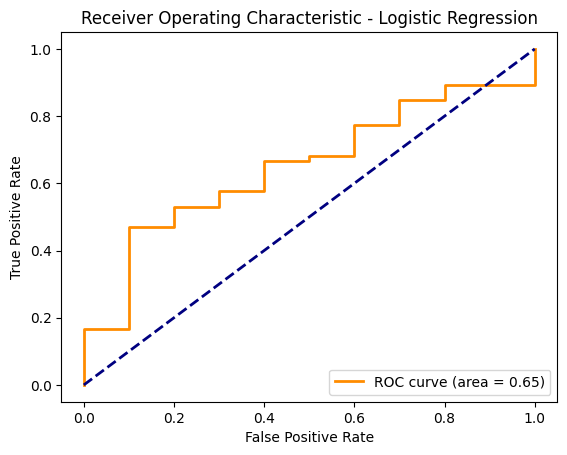

In [30]:
log_reg = LogisticRegression(random_state=42, max_iter=100000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")


Random Forest
Accuracy: 0.1447
              precision    recall  f1-score   support

           0       0.13      1.00      0.24        10
           1       1.00      0.02      0.03        66

    accuracy                           0.14        76
   macro avg       0.57      0.51      0.13        76
weighted avg       0.89      0.14      0.06        76



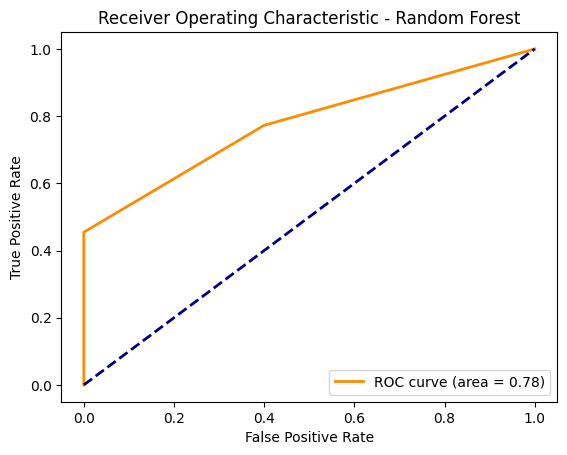

In [31]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=10)
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test, "Random Forest")

[LightGBM] [Info] Number of positive: 149, number of negative: 4668
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22084
[LightGBM] [Info] Number of data points in the train set: 4817, number of used features: 230
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030932 -> initscore=-3.444540
[LightGBM] [Info] Start training from score -3.444540

LightGBM
Accuracy: 0.1842
              precision    recall  f1-score   support

           0       0.14      1.00      0.24        10
           1       1.00      0.06      0.11        66

    accuracy                           0.18        76
   macro avg       0.57      0.53      0.18        76
weighted avg       0.89      0.18      0.13        76



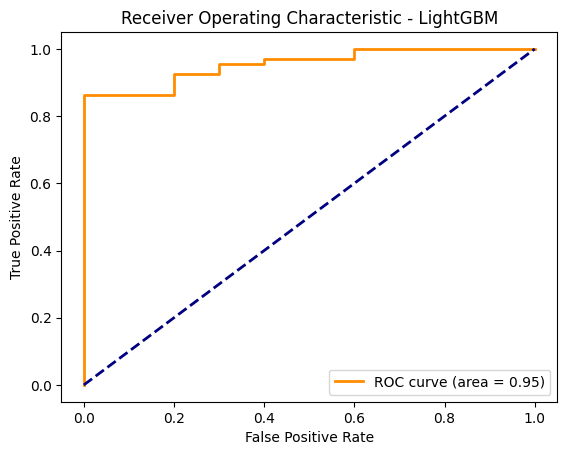

In [32]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test, "LightGBM")

c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.2368
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        10
           1       1.00      0.12      0.22        66

    accuracy                           0.24        76
   macro avg       0.57      0.56      0.24        76
weighted avg       0.89      0.24      0.22        76



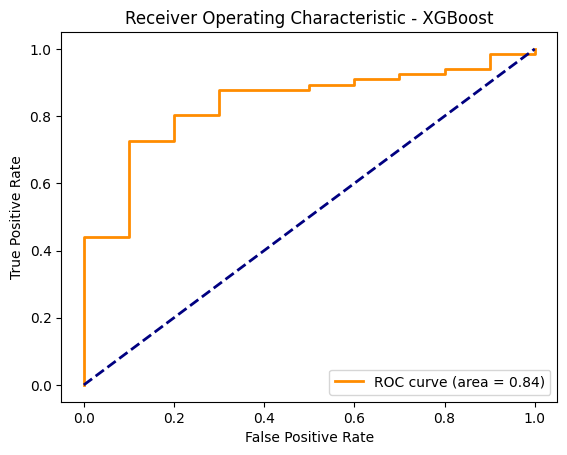

In [33]:
xgboost = XGBClassifier(random_state=50, use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
evaluate_model(xgboost, X_test, y_test, "XGBoost") # ну норм

С результатом похуже


Decision Tree
Accuracy: 0.2500
              precision    recall  f1-score   support

           0       0.10      0.60      0.17        10
           1       0.76      0.20      0.31        66

    accuracy                           0.25        76
   macro avg       0.43      0.40      0.24        76
weighted avg       0.68      0.25      0.29        76



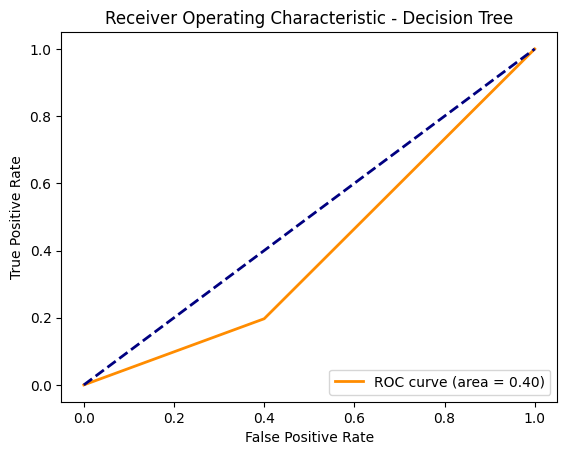

In [34]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
evaluate_model(decision_tree, X_test, y_test, "Decision Tree")# както грустно


Neural Network (MLPClassifier)
Accuracy: 0.1316
              precision    recall  f1-score   support

           0       0.13      1.00      0.23        10
           1       0.00      0.00      0.00        66

    accuracy                           0.13        76
   macro avg       0.07      0.50      0.12        76
weighted avg       0.02      0.13      0.03        76



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

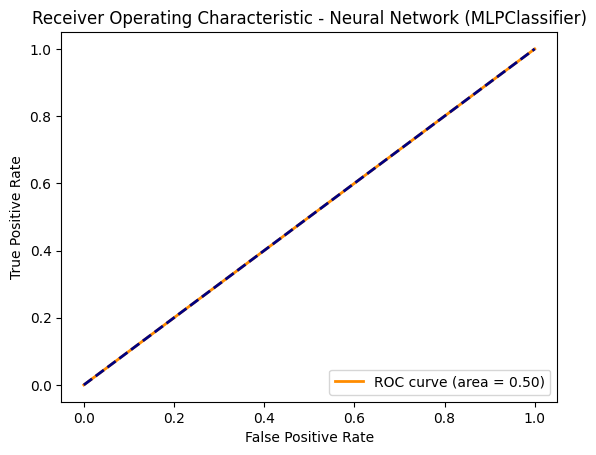

In [35]:
mlp = MLPClassifier(random_state=10000, max_iter=100)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_test, y_test, "Neural Network (MLPClassifier)") # ну тут в + непалучилось больше 55 никак

пытаемся настроить модельку и протестить 


c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
146 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-


Random Forest
Accuracy: 0.1316
              precision    recall  f1-score   support

           0       0.13      1.00      0.23        10
           1       0.00      0.00      0.00        66

    accuracy                           0.13        76
   macro avg       0.07      0.50      0.12        76
weighted avg       0.02      0.13      0.03        76



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

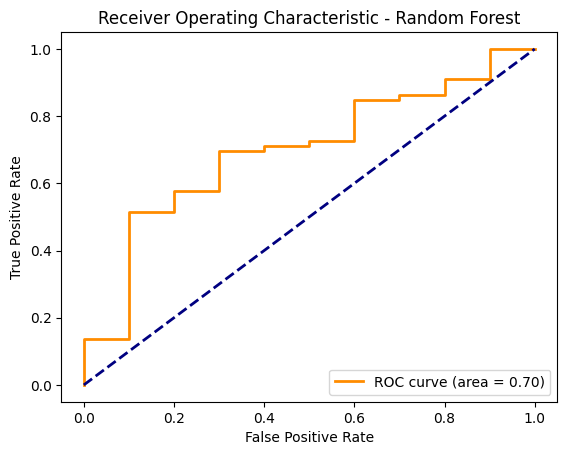

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from xgboost import XGBClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Оценка RandomForest
evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

In [37]:
X_train = df1.drop(columns=["target"])
y_train = df1["target"]

X_val = df2.drop(columns=["target"])
y_val = df2["target"]

In [38]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.13
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.13      1.00      0.23        10
           1       0.00      0.00      0.00        66

    accuracy                           0.13        76
   macro avg       0.07      0.50      0.12        76
weighted avg       0.02      0.13      0.03        76



c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josha\OneDrive\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

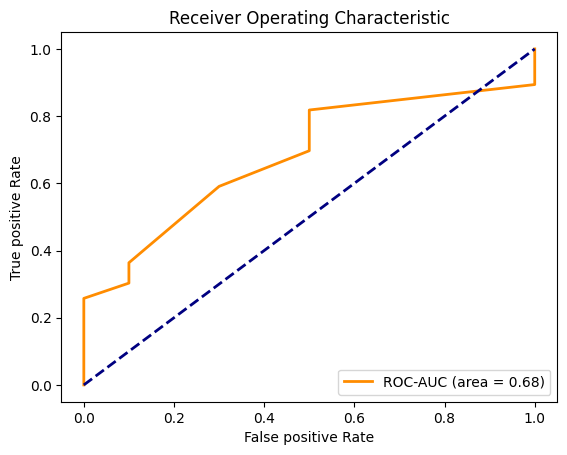

In [39]:
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()